In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
bio = pd.read_csv('C:/Users/bodak/Desktop/_75fb7a1b6f3431b6217cdbcba2fd30b9_gbm-data.csv')

In [3]:
bio.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y=np.array(bio.iloc[:,0])
X=np.array(bio.iloc[:,1:])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [6]:
x = [1, 0.5, 0.3, 0.2, 0.1]
test_loss = list()
for i in x: 
    gbc = GradientBoostingClassifier(n_estimators=250, learning_rate= i, verbose=True, random_state=241 )
    gbc.fit(X_train, y_train)
    for j, y_decision in enumerate(gbc.staged_decision_function(X_test)):
        y_pred = 1.0/(1.0 + np.exp(-y_decision))
        test_loss.append([i + 1, log_loss(y_test, y_pred)])
    test_loss = pd.DataFrame(test_loss, columns=['iter','loss'])
    print(test_loss[test_loss.loss==test_loss.loss.min()])

      Iter       Train Loss   Remaining Time 
         1           1.0190            1.66m
         2           0.9192            1.08m
         3           0.8272           59.37s
         4           0.7834           55.78s
         5           0.7109           51.50s
         6           0.6368           48.23s
         7           0.5797           46.17s
         8           0.5610           47.77s
         9           0.5185           47.26s
        10           0.4984           46.97s
        20           0.1999           40.92s
        30           0.1313           37.22s
        40           0.0790           34.29s
        50           0.0511           31.86s
        60           0.0352           29.19s
        70           0.0245           26.94s
        80           0.0162           24.91s
        90           0.0114           23.51s
       100           0.0077           22.01s
       200           0.0004            6.44s
   iter      loss
0     2  0.582294
      Iter       T

In [10]:
gbc = GradientBoostingClassifier(n_estimators=250, learning_rate= 0.2, verbose=True, random_state=241 )
gbc.fit(X_train, y_train)
test_loss = list()
for j, y_decision in enumerate(gbc.staged_decision_function(X_test)):
    y_pred = 1.0/(1.0 + np.exp(-y_decision))
    test_loss.append([j + 1, log_loss(y_test, y_pred)])
test_loss = pd.DataFrame(test_loss, columns=['iter','loss'])

      Iter       Train Loss   Remaining Time 
         1           1.2613           27.39s
         2           1.1715           26.16s
         3           1.1009           26.51s
         4           1.0529           26.08s
         5           1.0130           25.92s
         6           0.9740           25.62s
         7           0.9475           27.94s
         8           0.9197           27.77s
         9           0.8979           28.04s
        10           0.8730           28.13s
        20           0.7207           28.16s
        30           0.6055           27.66s
        40           0.5244           26.19s
        50           0.4501           24.76s
        60           0.3908           23.46s
        70           0.3372           22.24s
        80           0.3009           20.91s
        90           0.2603           19.56s
       100           0.2327           18.47s
       200           0.0835            6.92s


In [29]:
train_loss=list()
for j, y_decision in enumerate(gbc.staged_decision_function(X_train)):
    y_pred = 1.0/(1.0 + np.exp(-y_decision))
    train_loss.append([j + 1, log_loss(y_train, y_pred)])


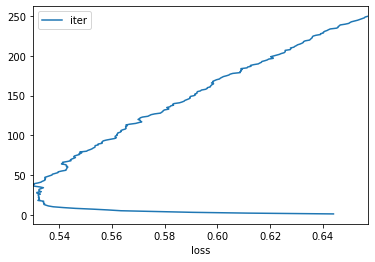

In [14]:
%matplotlib inline
test_loss.plot('loss')

In [18]:
clf = RandomForestClassifier(n_estimators = 37, random_state = 241)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [22]:
pred=clf.predict_proba(X_test)

In [23]:
log_loss(y_test, pred)

0.5410941951182815